<font size=+3 color="#3D3D3D"><center><b>Predicting Customer Churn with Machine Learning 🏦💰</b></center></font>

<img src="https://images.unsplash.com/photo-1520033906782-1684d0e7498e?ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&ixlib=rb-1.2.1&auto=format&fit=crop&w=1334&q=80" width = 600>

<br>

# Introduction


Customer churn (also known as customer attrition) occurs when a customer stops using a company's products or services. 

Customer churn affects profitability, especially in industries where revenues are heavily dependent on subscriptions (e.g. banks, telephone and internet service providers, pay-TV companies, insurance firms, etc.). It is estimated that acquiring a new customer can cost up to five times more than retaining an existing one.

Therefore, customer churn analysis is essential as it can help a business:

- identify problems in its services (e.g. poor quality product/service, poor customer support, wrong target audience, etc.), and 
- make correct strategic decisions that would lead to higher customer satisfaction and consequently higher customer retention.


<br>

# Objective

The goal of this notebook is to understand and predict customer churn for a bank. Specifically, we will initially perform **Exploratory Data Analysis** (**EDA**) to identify and visualise the factors contributing to customer churn. This analysis will later help us build **Machine Learning** models to predict whether a customer will churn or not. 

This problem is a typical **classification** task. According to the problem  **accuracy**, **precision**, **recall**, **F1-score** and **AUC-ROC** performance metric to use for optimising our machine learning models. 

<br>

*Skills: Exploratory Data Analysis, Data Visualisation, Data Preprocessing (Feature Selection, Encoding Categorical Features, Feature Scaling), Addressing Class Imbalance (SMOTE), Model Tuning.*

*Models Used:  Logistic Regression, Random Forest, or Gradient Boosting, stacking classifier.*


<br>

# Importing Libraries & Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import plotly.express as px
%matplotlib inline

from sklearn.model_selection import train_test_split 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.naive_bayes import MultinomialNB 
from sklearn.linear_model import LogisticRegression

import plotly.graph_objects as go

import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv(r'C:\Users\HARSHVARDHAN SINGH\Downloads\bank.csv',sep=';')
df1=df.copy()

<br>


#  A Quick Look at our Data

We start by importing the dataset as a Pandas DataFrame. We can also take a look at the top five rows using the `head()` method:

In [3]:
df.head()

age          job  marital  education default  balance housing loan  \
0   30   unemployed  married    primary      no     1787      no   no   
1   33     services  married  secondary      no     4789     yes  yes   
2   35   management   single   tertiary      no     1350     yes   no   
3   30   management  married   tertiary      no     1476     yes  yes   
4   59  blue-collar  married  secondary      no        0     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome   y  
0  cellular   19   oct        79         1     -1         0  unknown  no  
1  cellular   11   may       220         1    339         4  failure  no  
2  cellular   16   apr       185         1    330         1  failure  no  
3   unknown    3   jun       199         4     -1         0  unknown  no  
4   unknown    5   may       226         1     -1         0  unknown  no

In [4]:
print('number of columns:',df.columns)
print()
print('shape of dataframes:',df.shape)


number of columns: Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

shape of dataframes: (4521, 17)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [6]:
df.describe()

age       balance          day     duration     campaign  \
count  4521.000000   4521.000000  4521.000000  4521.000000  4521.000000   
mean     41.170095   1422.657819    15.915284   263.961292     2.793630   
std      10.576211   3009.638142     8.247667   259.856633     3.109807   
min      19.000000  -3313.000000     1.000000     4.000000     1.000000   
25%      33.000000     69.000000     9.000000   104.000000     1.000000   
50%      39.000000    444.000000    16.000000   185.000000     2.000000   
75%      49.000000   1480.000000    21.000000   329.000000     3.000000   
max      87.000000  71188.000000    31.000000  3025.000000    50.000000   

             pdays     previous  
count  4521.000000  4521.000000  
mean     39.766645     0.542579  
std     100.121124     1.693562  
min      -1.000000     0.000000  
25%      -1.000000     0.000000  
50%      -1.000000     0.000000  
75%      -1.000000     0.000000  
max     871.000000    25.000000

The most important things to note are:

- The age of customers ranges from 19 to 87, with a mean value approximately equal to 41,
- The balance has a 1422as mean, -3313.0 value as minimum value and max value is 711188
  * it has a outliers
- previous column has very diffrent values.

EDA will help us understand our dataset better. However, before we look at the data any further, we need to create a **test set**, put it aside, and use it only to evaluate our Machine Learning models.

<br>

# Creating a Test Set

We will split our dataset into a train and test set using scikit-learn's `train_test_split()` function, which implements random sampling. Our dataset is large enough (especially relative to the number of features), so we do **not** risk introducing *sampling bias*.

In [7]:
train_df, test_df = train_test_split(df, test_size=0.25, random_state=105)

train_df.reset_index(drop=True, inplace=True)
test_df.reset_index(drop=True, inplace=True)

print('Train set: {} rows x {} columns'.format(train_df.shape[0],
                                               train_df.shape[1]))
print(' Test set: {} rows x {} columns'.format(test_df.shape[0],
                                               test_df.shape[1]))

Train set: 3390 rows x 17 columns
 Test set: 1131 rows x 17 columns


In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        3390 non-null   int64 
 1   job        3390 non-null   object
 2   marital    3390 non-null   object
 3   education  3390 non-null   object
 4   default    3390 non-null   object
 5   balance    3390 non-null   int64 
 6   housing    3390 non-null   object
 7   loan       3390 non-null   object
 8   contact    3390 non-null   object
 9   day        3390 non-null   int64 
 10  month      3390 non-null   object
 11  duration   3390 non-null   int64 
 12  campaign   3390 non-null   int64 
 13  pdays      3390 non-null   int64 
 14  previous   3390 non-null   int64 
 15  poutcome   3390 non-null   object
 16  y          3390 non-null   object
dtypes: int64(7), object(10)
memory usage: 450.4+ KB


In [9]:
df

age            job  marital  education default  balance housing loan  \
0      30     unemployed  married    primary      no     1787      no   no   
1      33       services  married  secondary      no     4789     yes  yes   
2      35     management   single   tertiary      no     1350     yes   no   
3      30     management  married   tertiary      no     1476     yes  yes   
4      59    blue-collar  married  secondary      no        0     yes   no   
...   ...            ...      ...        ...     ...      ...     ...  ...   
4516   33       services  married  secondary      no     -333     yes   no   
4517   57  self-employed  married   tertiary     yes    -3313     yes  yes   
4518   57     technician  married  secondary      no      295      no   no   
4519   28    blue-collar  married  secondary      no     1137      no   no   
4520   44   entrepreneur   single   tertiary      no     1136     yes  yes   

       contact  day month  duration  campaign  pdays  previous poutcome   y  
0     cellular   19   oct        79         1     -1         0  unknown  no  
1     cellular   11   may       220         1    339         4  failure  no  
2     cellular   16   apr       185         1    330         1  failure  no  
3      unknown    3   jun       199         4     -1         0  unknown  no  
4      unknown    5   may       226         1     -1         0  unknown  no  
...        ...  ...   ...       ...       ...    ...       ...      ...  ..  
4516  cellular   30   jul       329         5     -1         0  unknown  no  
4517   unknown    9   may       153         1     -1         0  unknown  no  
4518  cellular   19   aug       151        11     -1         0  unknown  no  
4519  cellular    6   feb       129         4    211         3    other  no  
4520  cellular    3   apr       345         2    249         7    other  no  

[4521 rows x 17 columns]


# Checking for nullValues

In [10]:
train_df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

<br>

- Binary classifiaction
 - Zero (0) for a customer that has **not** churned, and
 - One (1) for a customer that has churned.
- Imbalanced data requires smote
- No null values


In [11]:
discrete_columns=['marital', 'education', 'default', 'housing','loan', 'contact','job',  'month', 'poutcome', 'previous']

In [12]:
continous_variable=['age','balance','day', 'duration', 'campaign', 'pdays']

In [13]:
for val in discrete_columns:
    
    print('name of column:',val)
    print('uniques values',pd.unique(train_df[val]))
    print('number of uniques values:',len(train_df[val].value_counts()))
    
    print('*'*30)
    print(train_df[val].value_counts())
    print('*'*80)
    print('*'*80)

name of column: marital
uniques values ['married' 'single' 'divorced']
number of uniques values: 3
******************************
married     2102
single       908
divorced     380
Name: marital, dtype: int64
********************************************************************************
********************************************************************************
name of column: education
uniques values ['secondary' 'unknown' 'tertiary' 'primary']
number of uniques values: 4
******************************
secondary    1725
tertiary     1026
primary       501
unknown       138
Name: education, dtype: int64
********************************************************************************
********************************************************************************
name of column: default
uniques values ['no' 'yes']
number of uniques values: 2
******************************
no     3332
yes      58
Name: default, dtype: int64
*********************************************************

<br>

# Dataset undestanding & Exploratory Data Analysis

## Target Variable: Y

We need to use encoding to enoded and can take two possible values:

- Zero (0) for a customer that has **not** churned, and
- One (1) for a customer that has churned.

In [14]:
train_df['y']=pd.get_dummies(train_df['y'],drop_first=True)
test_df['y']=pd.get_dummies(test_df['y'],drop_first=True)

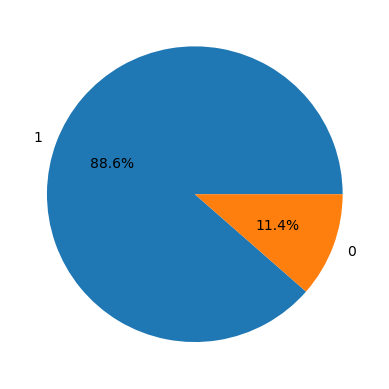

In [15]:

lst=list(train_df.y.value_counts())
lbs=list(pd.unique(train_df.y))
plt.pie(lst,labels=lbs,radius=1,autopct="%1.1f%%")
plt.show()

In [16]:
train_df.y.value_counts()

0    3002
1     388
Name: y, dtype: int64

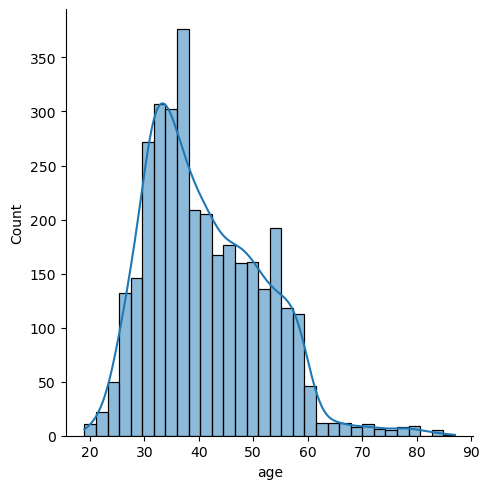

In [17]:
sn.displot(x=train_df['age'] ,kde=True)
plt.show()

In [18]:
def conti(val):
    fig, ax = plt.subplots(1, 2, figsize=(18,4))

    Val_Amount = train_df[val].values

    sn.boxplot(x=Val_Amount, ax=ax[0], color='r')
    ax[0].set_title(val, fontsize=14)
    ax[0].set_xlim([min(Val_Amount), max(Val_Amount)])

    sn.distplot(Val_Amount, ax=ax[1], color='b')
    ax[1].set_title(val, fontsize=14)
    ax[1].set_xlim([min(Val_Amount), max(Val_Amount)])
    plt.show()


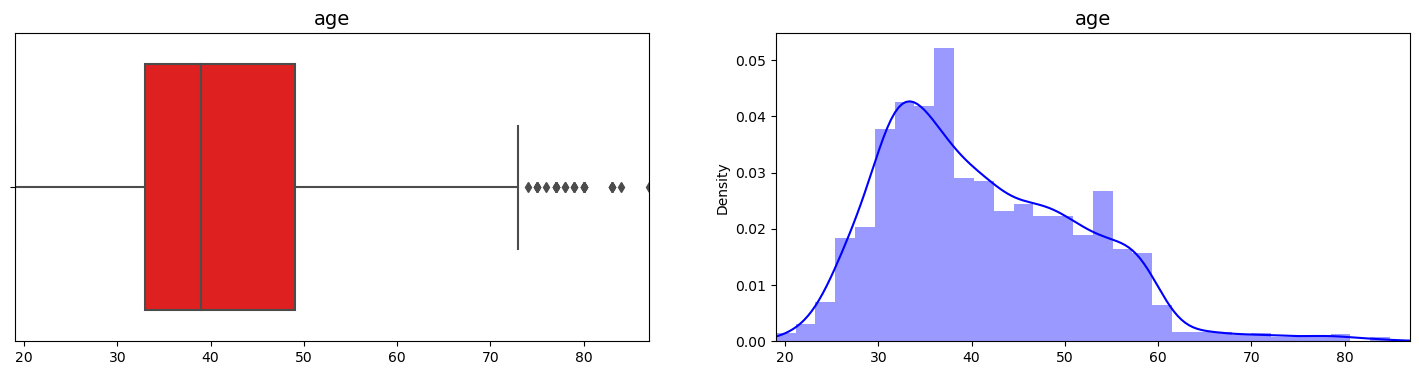

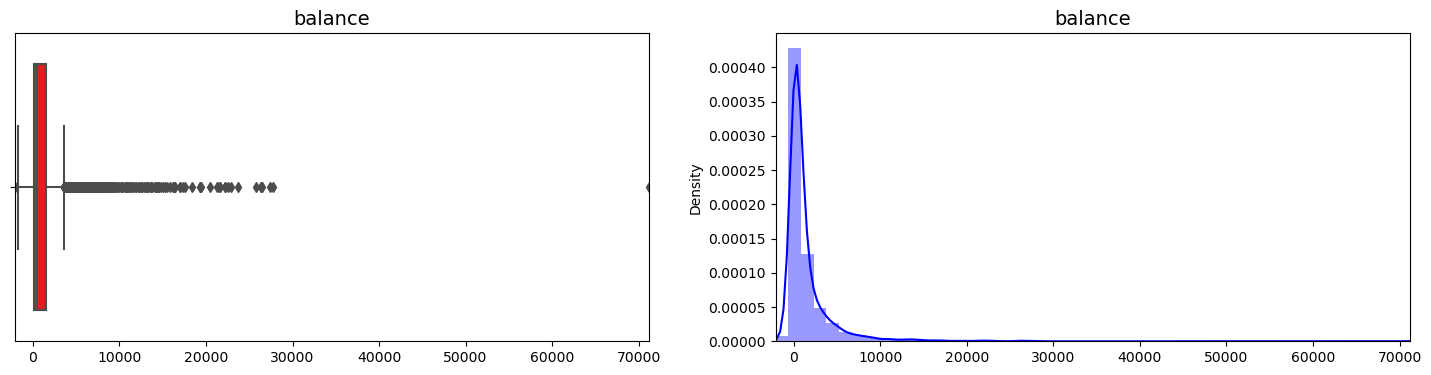

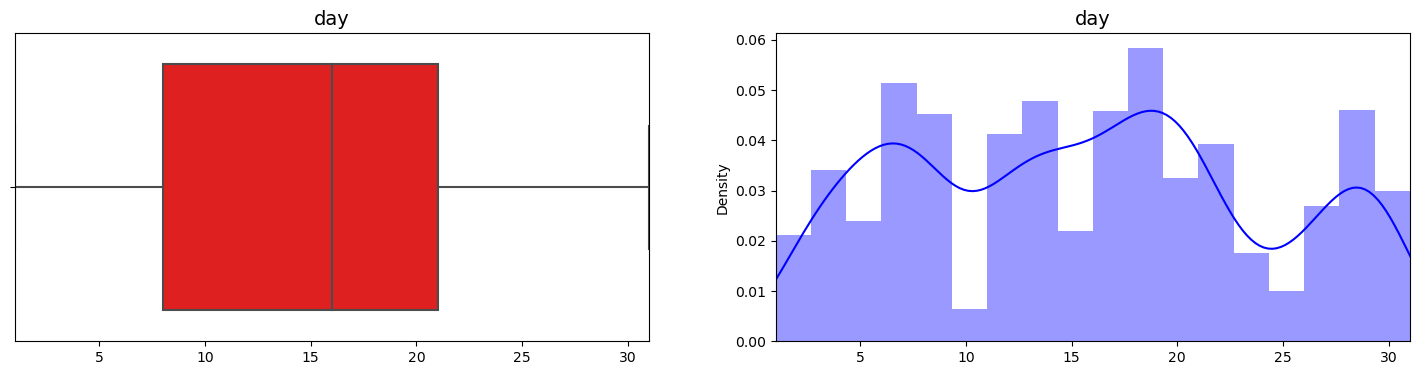

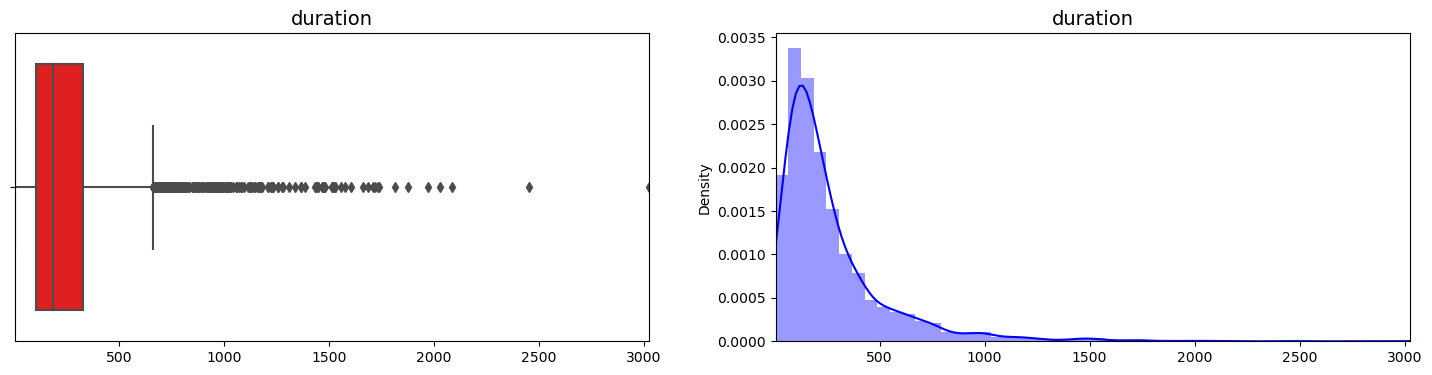

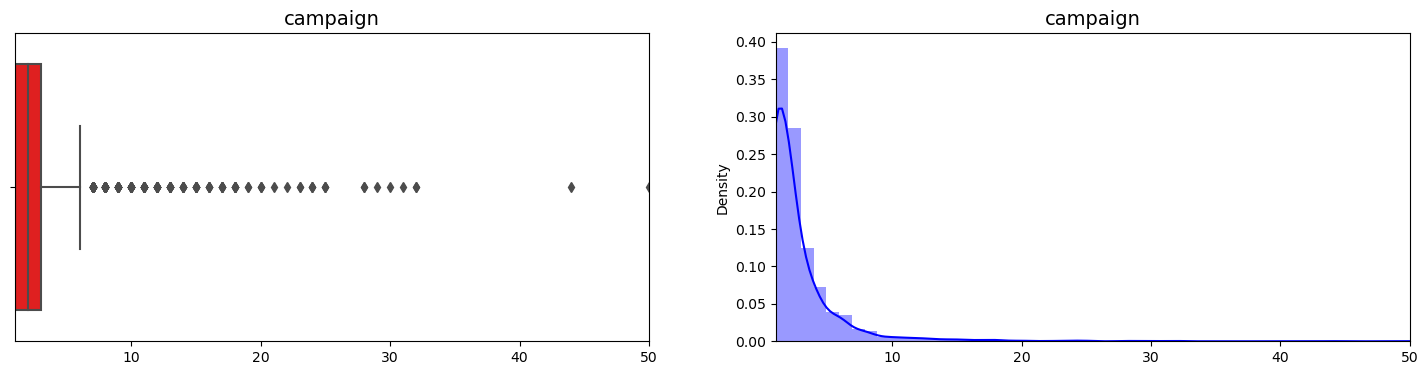

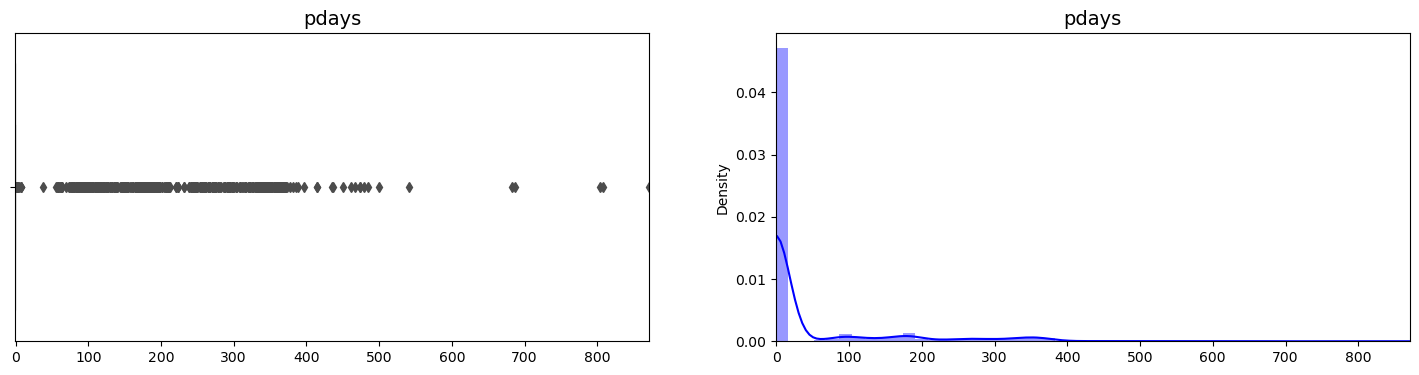

In [19]:
for val in continous_variable:
    conti(val)

In [20]:
def count(val):
    print(val)
    sn.countplot(data=df,x=val,)
    plt.show()

marital


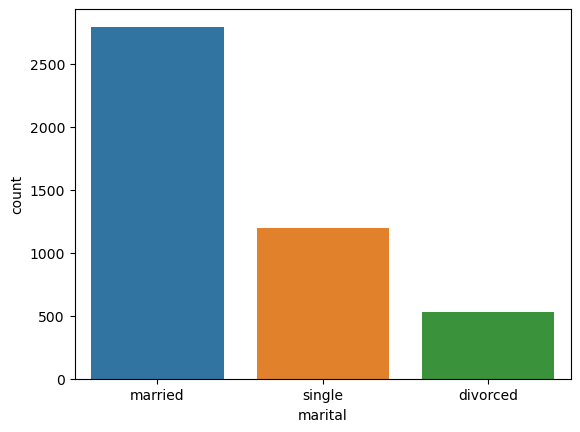

education


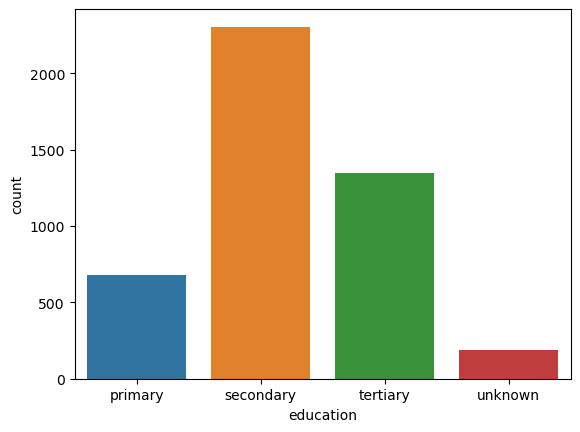

default


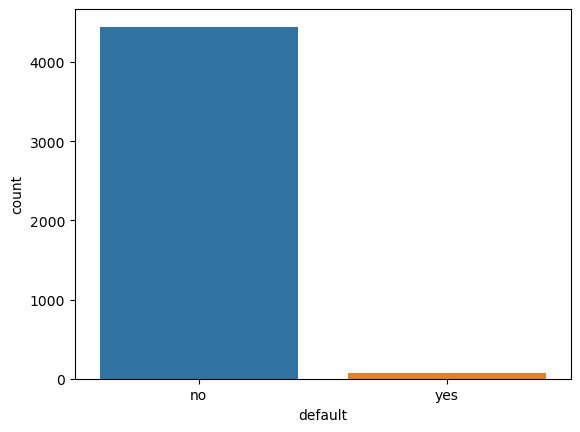

housing


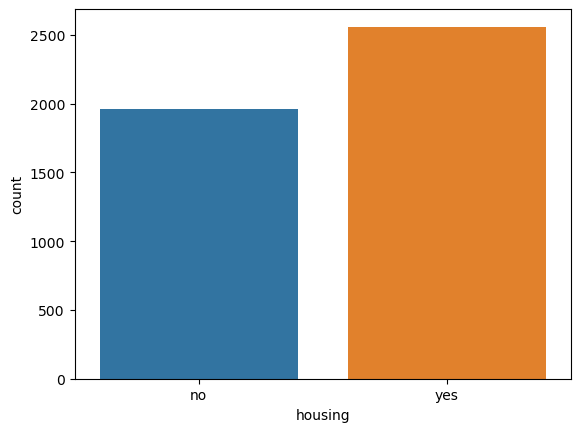

loan


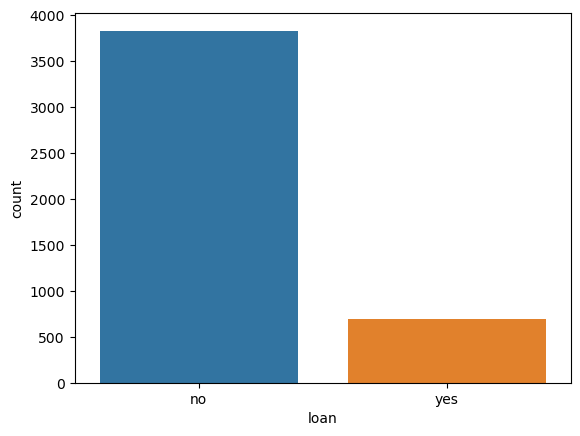

contact


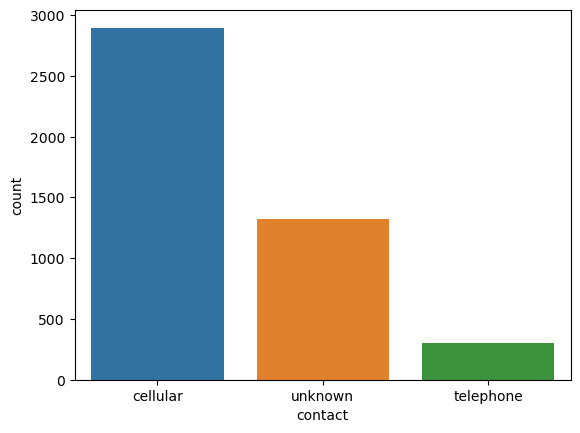

job


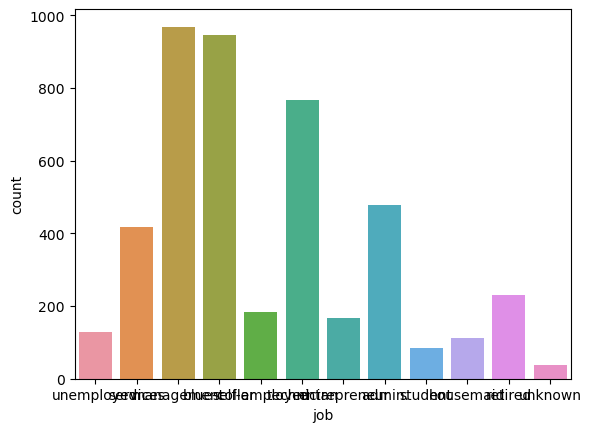

month


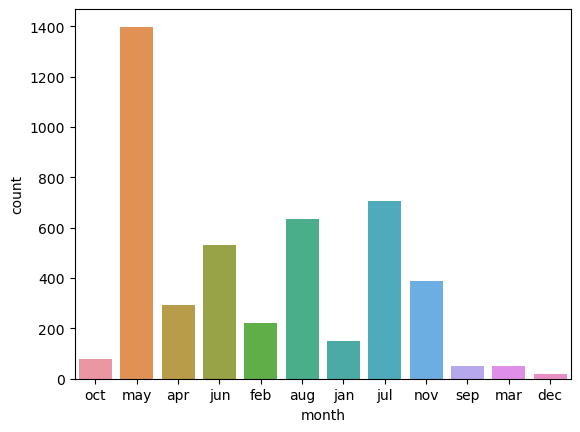

poutcome


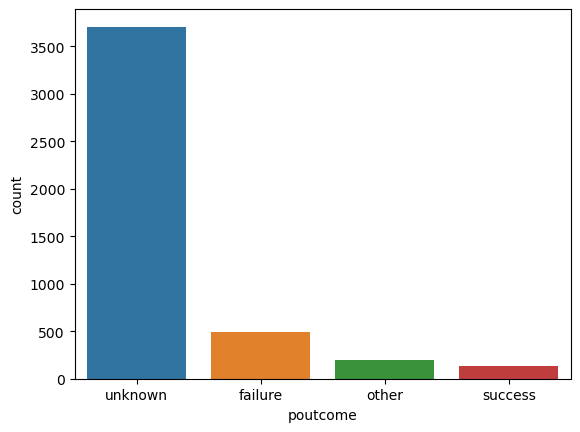

previous


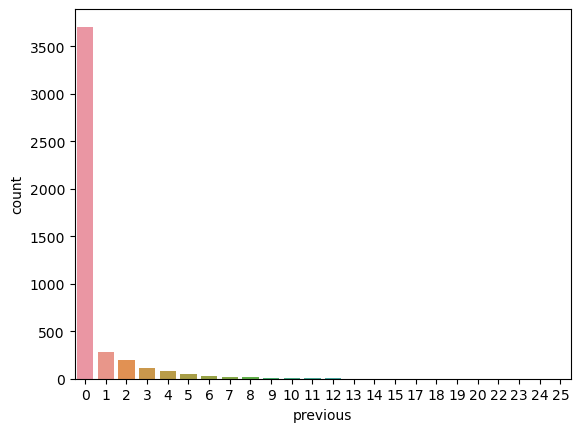

In [21]:
for val in discrete_columns:
    count(val)

<br>

# Bivariate Analysis

In [22]:
plt.figure(figsize=(25,20))
px.scatter(train_df,x='age', y='balance', color=train_df['y'])

<Figure size 2500x2000 with 0 Axes>

In [23]:

plt.figure(figsize=(25,20))
px.scatter(train_df,x='poutcome', y='balance', color=train_df['y'])

<Figure size 2500x2000 with 0 Axes>

In [24]:

plt.figure(figsize=(25,20))
px.scatter(train_df,x='housing', y='balance', color=train_df['y'])

<Figure size 2500x2000 with 0 Axes>

In [25]:
plt.figure(figsize=(25,20))
px.scatter(train_df,x='duration', y='balance', color=train_df['y'])

<Figure size 2500x2000 with 0 Axes>

In [26]:
df=train_df[train_df.y==1]
plt.figure(figsize=(25,20))
px.scatter(df,x='duration', y='balance', color=df['y'])

<Figure size 2500x2000 with 0 Axes>

In [27]:
df=train_df[df1.y==1]
plt.figure(figsize=(25,20))
px.scatter(df1,x='duration', y='balance', color=df1['month'])

<Figure size 2500x2000 with 0 Axes>

In [28]:
plt.figure(figsize=(25,20))
px.scatter(train_df,x='campaign', y='balance', color=train_df['y'])

<Figure size 2500x2000 with 0 Axes>

In [29]:
df=train_df[train_df.y==0]
plt.figure(figsize=(25,20))
px.scatter(df,x='duration', y='balance', color=df['y'])

<Figure size 2500x2000 with 0 Axes>

In [30]:
plt.figure(figsize=(25,20))
px.scatter(train_df,x='campaign', y='duration', color=train_df['y'])

<Figure size 2500x2000 with 0 Axes>

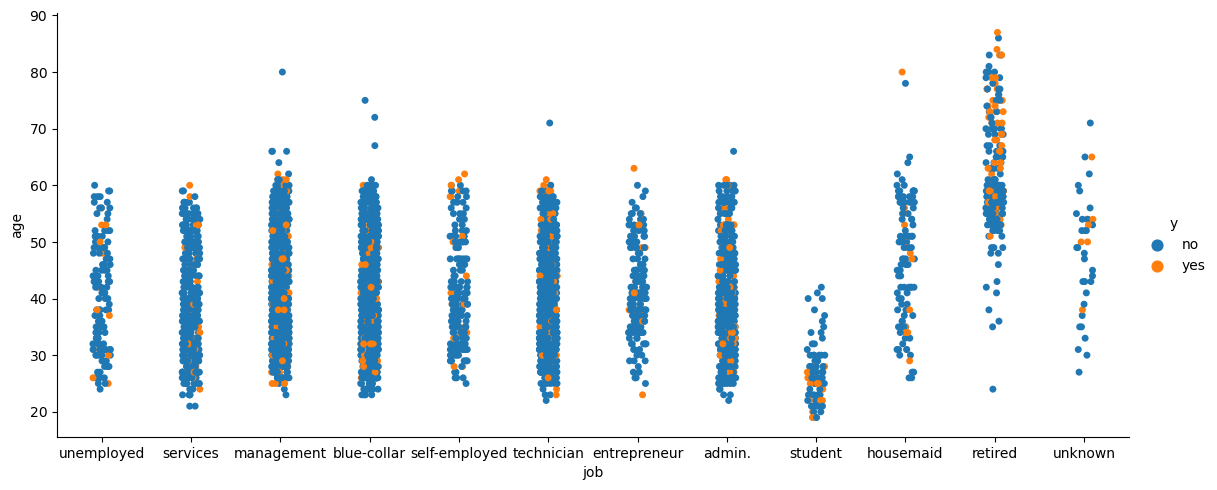

In [31]:
sn.catplot(data = df1, x = "job", y = "age", 
            hue = "y", jitter = 0.1, aspect = 2.3,height = 5)

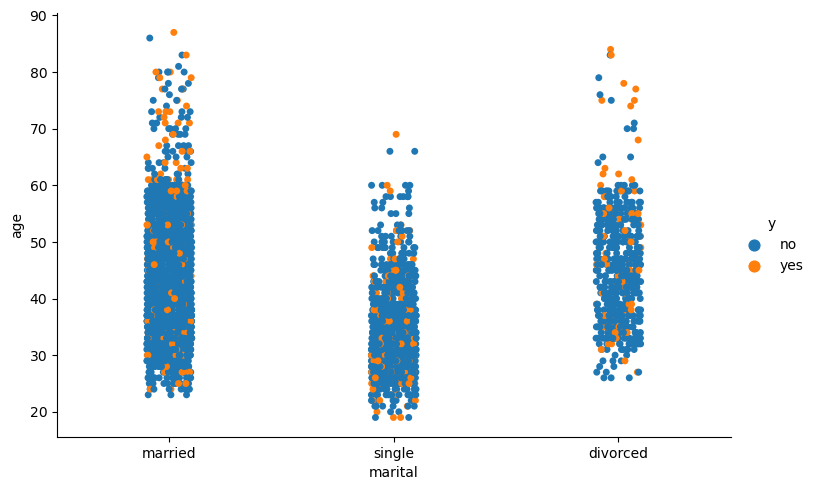

In [32]:
sn.catplot(data = df1, x = "marital", y = "age", 
            hue = "y", jitter = 0.1, aspect = 1.5,height = 5)

In [33]:
df1.groupby(["housing","loan"],as_index=False)["age"].mean()

housing loan        age
0      no   no  43.470483
1      no  yes  43.754386
2     yes   no  39.468184
3     yes  yes  38.879310

In [34]:
train_df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [35]:
train_df.corr()

age   balance       day  duration  campaign     pdays  \
age       1.000000  0.092274 -0.027740  0.017014 -0.020404 -0.010369   
balance   0.092274  1.000000 -0.011471 -0.029758 -0.012494  0.014870   
day      -0.027740 -0.011471  1.000000 -0.029058  0.161662 -0.090749   
duration  0.017014 -0.029758 -0.029058  1.000000 -0.069049 -0.003521   
campaign -0.020404 -0.012494  0.161662 -0.069049  1.000000 -0.087485   
pdays    -0.010369  0.014870 -0.090749 -0.003521 -0.087485  1.000000   
previous -0.003260  0.034777 -0.055934  0.015387 -0.071092  0.560476   
y         0.064747  0.010512 -0.017536  0.403313 -0.057263  0.088918   

          previous         y  
age      -0.003260  0.064747  
balance   0.034777  0.010512  
day      -0.055934 -0.017536  
duration  0.015387  0.403313  
campaign -0.071092 -0.057263  
pdays     0.560476  0.088918  
previous  1.000000  0.121004  
y         0.121004  1.000000

In [36]:
train_df.duration.max(),train_df.duration.min()

(3025, 5)

In [37]:
df=train_df[train_df.y==0]
plt.figure(figsize=(25,20))
px.scatter(df,x='duration', y='balance', color=df['month'])

<Figure size 2500x2000 with 0 Axes>

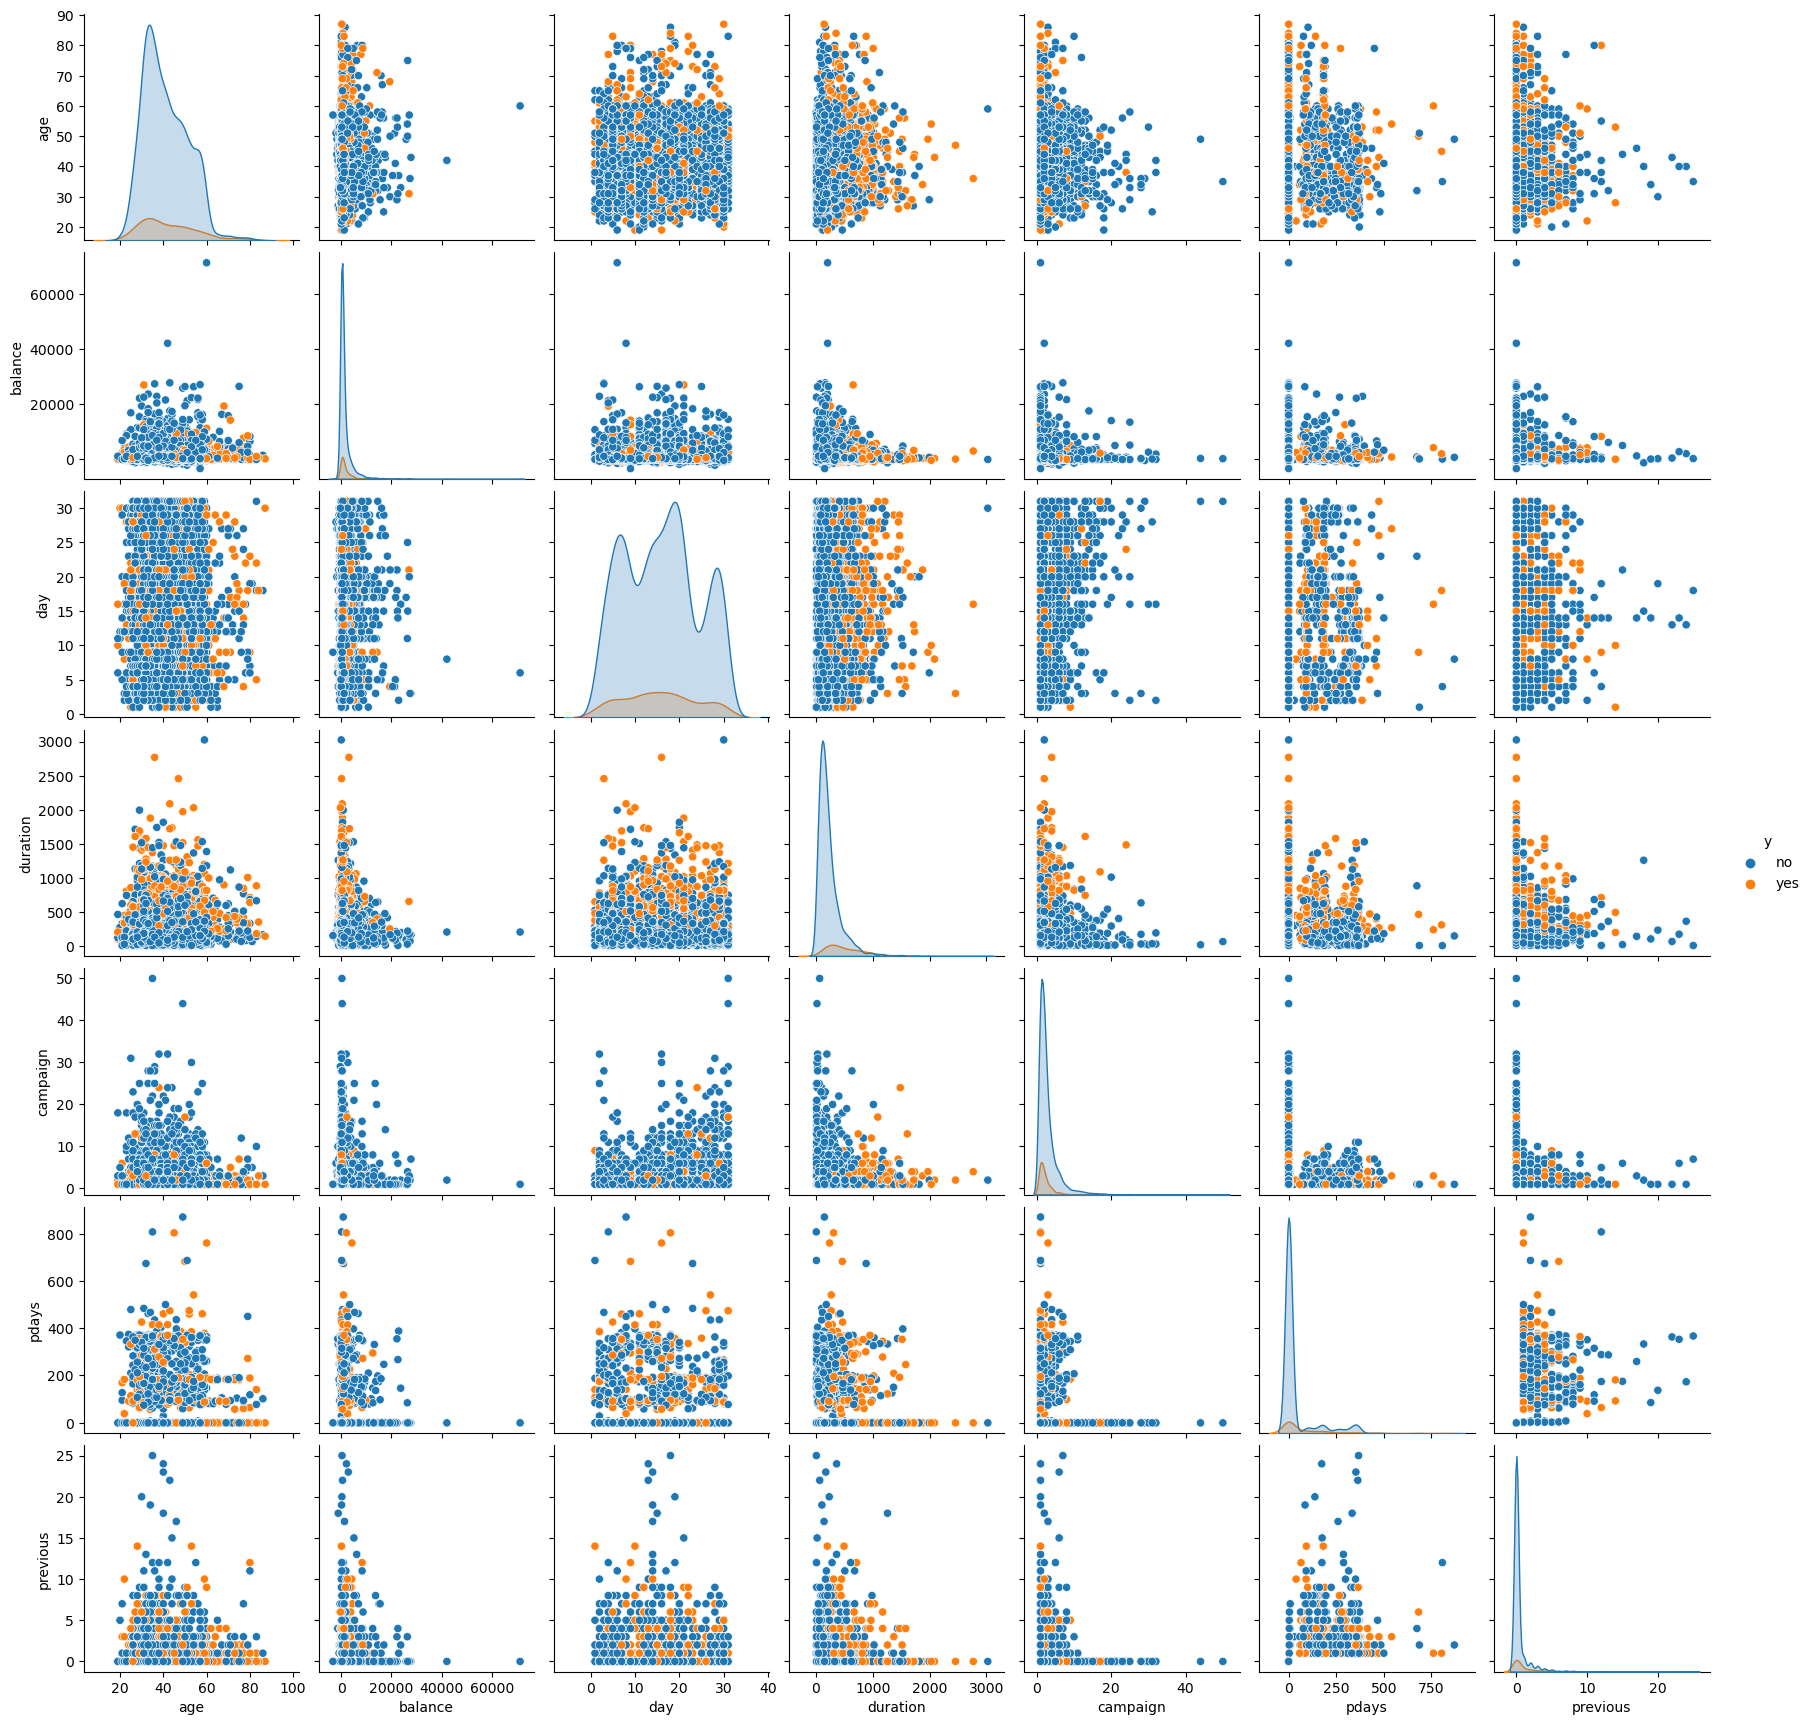

In [38]:
sn.pairplot(df1,hue='y')

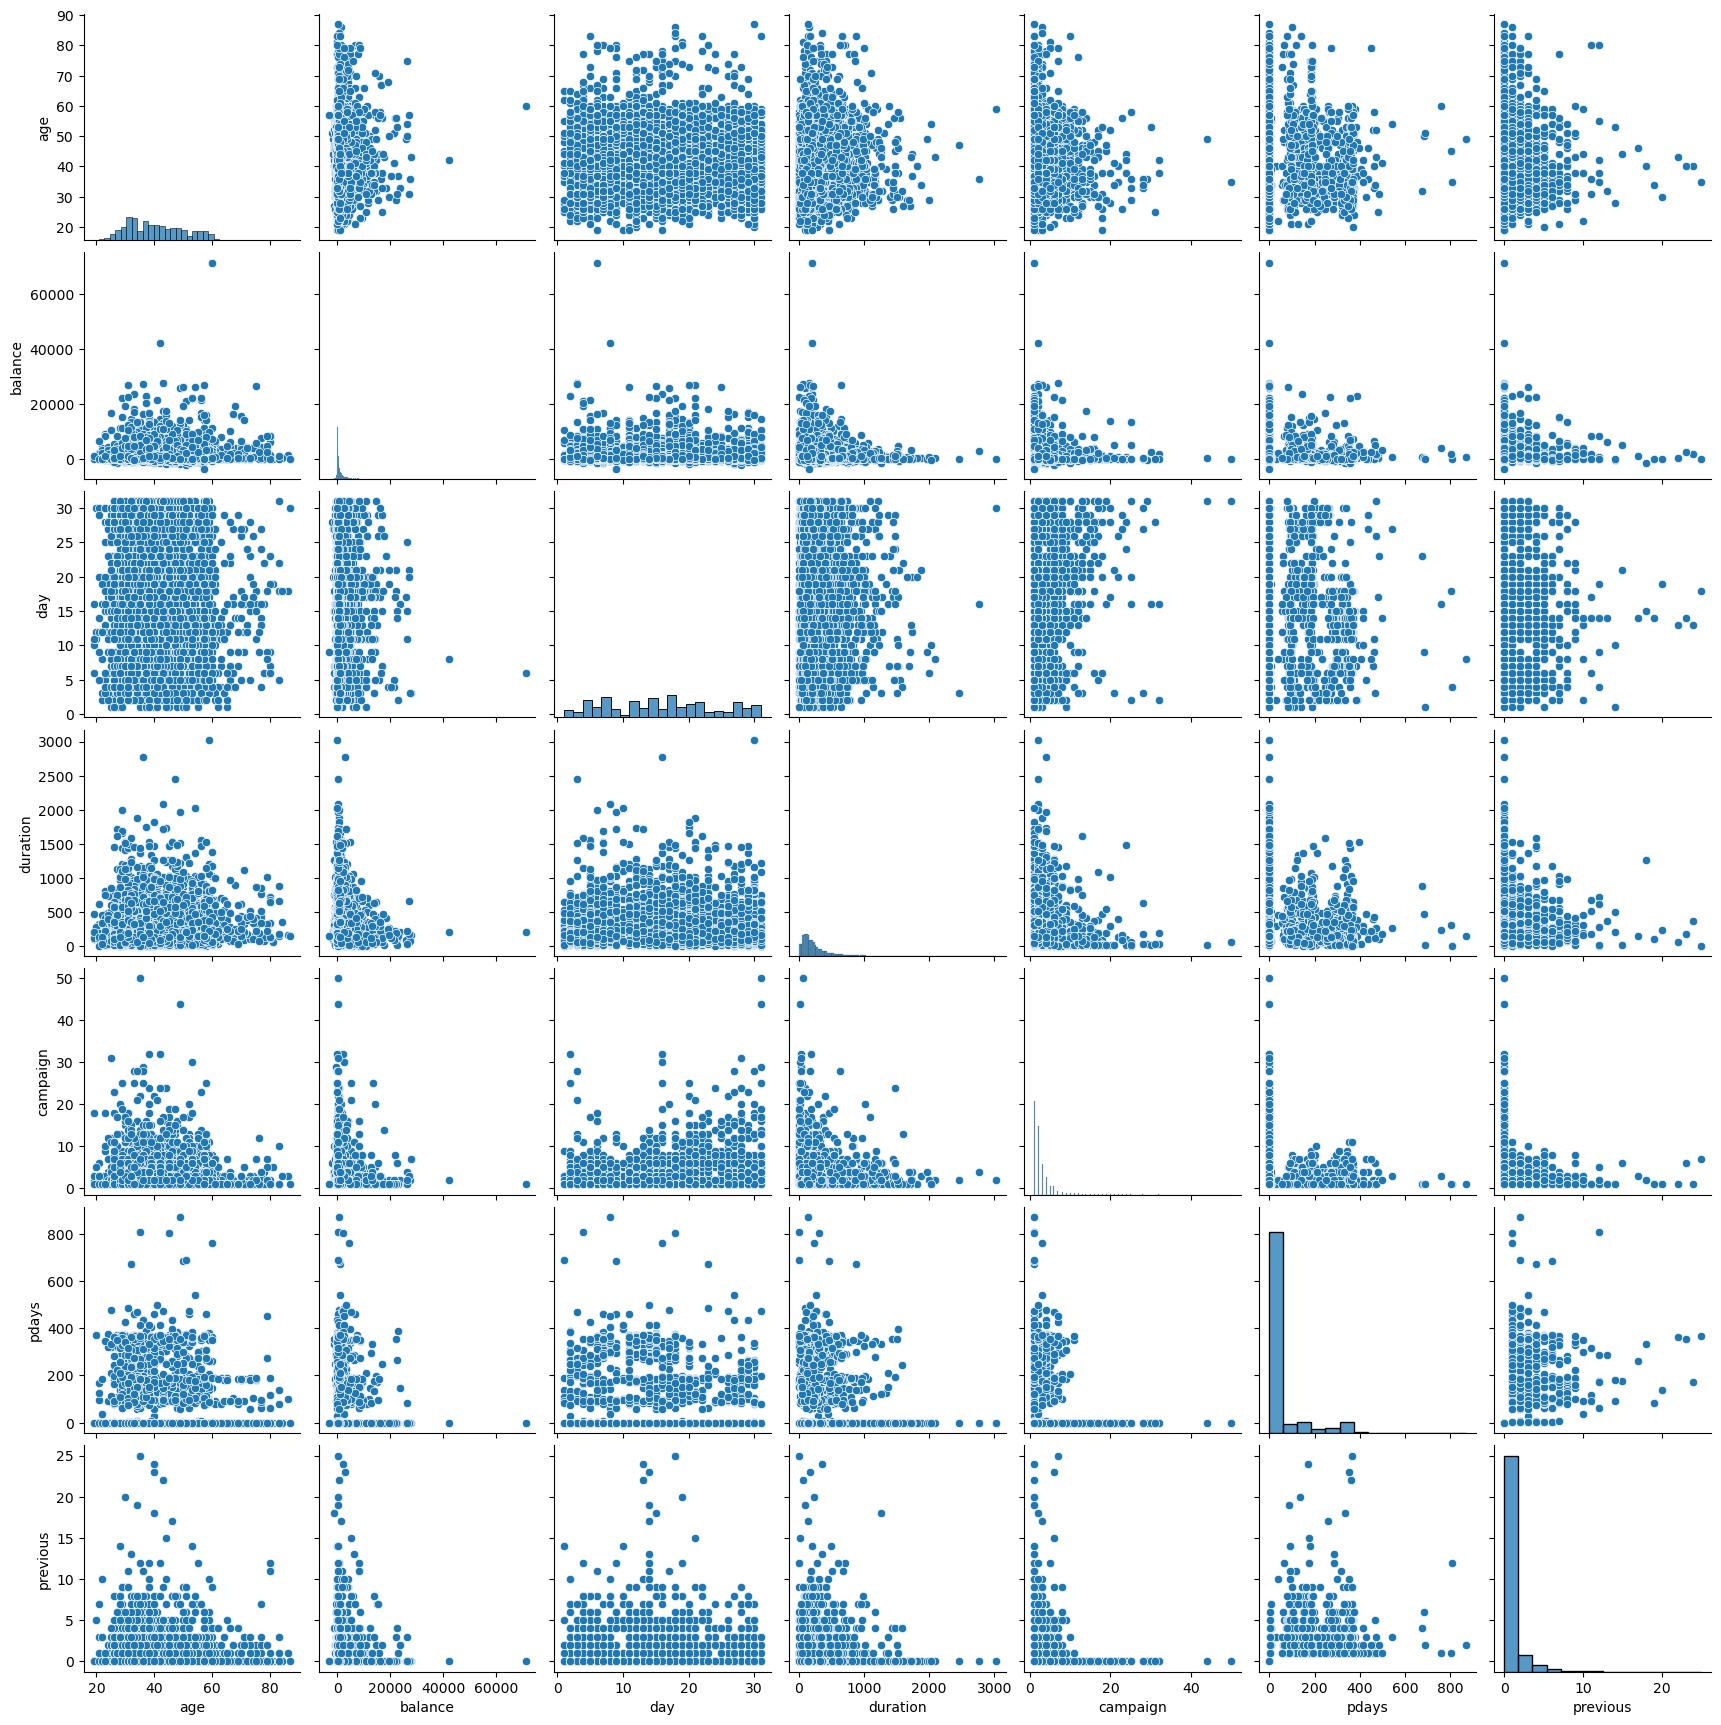

In [39]:
sn.pairplot(data = df1.drop("y",axis = 1))

In [40]:
# checking for normality

In [41]:
for val in continous_variable:
    print(val,'Skewness =',df1[val].skew())


age Skewness = 0.6995014533559305
balance Skewness = 6.596430546295735
day Skewness = 0.09462690455175846
duration Skewness = 2.7724197169136455
campaign Skewness = 4.74391446894159
pdays Skewness = 2.71707136656418


# feature selection

**heatmap**

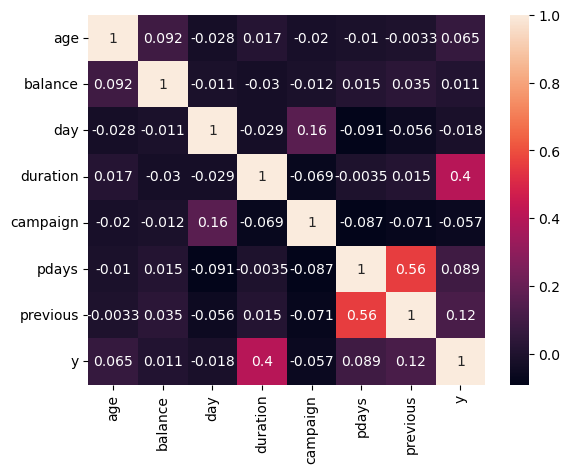

In [42]:

sn.heatmap(train_df.corr(),annot=True)
plt.show()

**calculating information gain**

In [43]:
#Checking INformation gain of each columns 
Name=[]
information=[]


def compute_impurity(feature, impurity_criterion):
    """
    This function calculates impurity of a feature.
    Supported impurity criteria: 'entropy', 'gini'
    input: feature (this needs to be a Pandas series)
    output: feature impurity
    """
    probs = feature.value_counts(normalize=True)
    
    if impurity_criterion == 'entropy':
        impurity = -1 * np.sum(np.log2(probs) * probs)
    elif impurity_criterion == 'gini':
        impurity = 1 - np.sum(np.square(probs))
    else:
        raise ValueError('Unknown impurity criterion')
        
    return(round(impurity, 3))


def comp_feature_information_gain(df, target, descriptive_feature, split_criterion):
    """
    This function calculates information gain for splitting on 
    a particular descriptive feature for a given dataset
    and a given impurity criteria.
    Supported split criterion: 'entropy', 'gini'
    """
    
    print('target feature:', target)
    print('descriptive_feature:', descriptive_feature)
    print('split criterion:', split_criterion)
            
    target_entropy = compute_impurity(df[target], split_criterion)

    # we define two lists below:
    # entropy_list to store the entropy of each partition
    # weight_list to store the relative number of observations in each partition
    entropy_list = list()
    weight_list = list()
    
    # loop over each level of the descriptive feature
    # to partition the dataset with respect to that level
    # and compute the entropy and the weight of the level's partition
    for level in df[descriptive_feature].unique():
        df_feature_level = df[df[descriptive_feature] == level]
        entropy_level = compute_impurity(df_feature_level[target], split_criterion)
        entropy_list.append(round(entropy_level, 3))
        weight_level = len(df_feature_level) / len(df)
        weight_list.append(round(weight_level, 3))

    print('impurity of partitions:', entropy_list)
    print('weights of partitions:', weight_list)

    feature_remaining_impurity = np.sum(np.array(entropy_list) * np.array(weight_list))
    print('remaining impurity:', feature_remaining_impurity)
    
    information_gain = target_entropy - feature_remaining_impurity
    print('information gain:', information_gain)
    Name.append(descriptive_feature)
    information.append(information_gain)
    
    print('====================')

    return(information_gain)




In [44]:
entropy_calculate=train_df[['job', 'marital', 'education', 'default', 'housing','loan', 'contact',  'month', 'poutcome', 'previous','y']]

In [45]:
split_criterion = 'entropy'
for feature in entropy_calculate.drop(columns='y').columns:
    feature_info_gain = comp_feature_information_gain(entropy_calculate, 'y', feature, split_criterion)

target feature: y
descriptive_feature: job
split criterion: entropy
impurity of partitions: [0.771, 0.663, 0.364, 0.446, 0.494, 0.567, 0.546, 0.575, 0.529, 0.453, 0.435, 0.805]
weights of partitions: [0.052, 0.009, 0.208, 0.086, 0.177, 0.104, 0.213, 0.026, 0.029, 0.04, 0.036, 0.019]
remaining impurity: 0.5021969999999999
information gain: 0.010803000000000118
target feature: y
descriptive_feature: marital
split criterion: entropy
impurity of partitions: [0.479, 0.56, 0.576]
weights of partitions: [0.62, 0.268, 0.112]
remaining impurity: 0.511572
information gain: 0.0014279999999999848
target feature: y
descriptive_feature: education
split criterion: entropy
impurity of partitions: [0.502, 0.45, 0.567, 0.449]
weights of partitions: [0.509, 0.041, 0.303, 0.148]
remaining impurity: 0.512221
information gain: 0.0007789999999999742
target feature: y
descriptive_feature: default
split criterion: entropy
impurity of partitions: [0.513, 0.531]
weights of partitions: [0.983, 0.017]
remaining im

In [46]:
information

[0.010803000000000118,
 0.0014279999999999848,
 0.0007789999999999742,
 -0.00030600000000002847,
 0.009004000000000123,
 0.003178000000000014,
 0.017384000000000066,
 0.027669,
 0.03849800000000003,
 0.021154000000000006]

In [47]:
train_df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [48]:
df

age          job  marital  education default  balance housing loan  \
1      43      unknown   single    unknown      no      181      no   no   
3      49  blue-collar  married  secondary      no     1568      no   no   
4      32  blue-collar  married  secondary      no      -63     yes   no   
5      28     services   single  secondary      no      317     yes   no   
6      25   technician   single  secondary      no     2157     yes   no   
...   ...          ...      ...        ...     ...      ...     ...  ...   
3384   50  blue-collar  married    unknown      no      452      no   no   
3386   34   technician   single  secondary      no      179      no   no   
3387   23  blue-collar   single    primary      no     8627     yes   no   
3388   41     services  married   tertiary      no      412     yes   no   
3389   33   technician  married  secondary      no       58     yes   no   

        contact  day month  duration  campaign  pdays  previous poutcome  y  
1     telephone   28   jan        41         1     -1         0  unknown  0  
3       unknown   21   may       206         6     -1         0  unknown  0  
4       unknown   30   may       198         1     -1         0  unknown  0  
5       unknown   16   may        21         3     -1         0  unknown  0  
6      cellular   21   jul       339         1     -1         0  unknown  0  
...         ...  ...   ...       ...       ...    ...       ...      ... ..  
3384   cellular   20   aug       181         2     -1         0  unknown  0  
3386   cellular   19   aug       294         3     -1         0  unknown  0  
3387    unknown    3   jun       281         1     -1         0  unknown  0  
3388    unknown    3   jun       154         5     -1         0  unknown  0  
3389  telephone   29   aug        57         2     -1         0  unknown  0  

[3002 rows x 17 columns]

In [49]:
#information gain test stats that marital and default features are not important for the model.
df_copy=train_df.copy()
#train_df=df_copy.copy()
train_df.drop(['education','marital','month','day','contact','poutcome'],axis=1,inplace=True)
test_df.drop(['education','marital','month','day','contact','poutcome'],axis=1,inplace=True)

In [50]:
train_df.head()

age          job default  balance housing loan  duration  campaign  pdays  \
0   68      retired      no    19317     yes   no       249         1     -1   
1   43      unknown      no      181      no   no        41         1     -1   
2   32  blue-collar      no      759     yes   no       317         5     -1   
3   49  blue-collar      no     1568      no   no       206         6     -1   
4   32  blue-collar      no      -63     yes   no       198         1     -1   

   previous  y  
0         0  1  
1         0  0  
2         0  1  
3         0  0  
4         0  0

In [51]:
print(train_df[(train_df.balance>55000) ])
print(train_df[(train_df.balance<-2000) ])

      age      job default  balance housing loan  duration  campaign  pdays  \
1456   60  retired      no    71188      no   no       205         1     -1   

      previous  y  
1456         0  0  
      age           job default  balance housing loan  duration  campaign  \
1252   51  entrepreneur     yes    -2082      no  yes       123         6   

      pdays  previous  y  
1252     -1         0  0  


In [52]:
print(df1[(df1.balance>55000) ])
print(df1[(df1.balance<-2000) ])

      age      job  marital education default  balance housing loan   contact  \
3700   60  retired  married   primary      no    71188      no   no  cellular   

      day month  duration  campaign  pdays  previous poutcome   y  
3700    6   oct       205         1     -1         0  unknown  no  
      age            job  marital  education default  balance housing loan  \
2398   51   entrepreneur  married  secondary     yes    -2082      no  yes   
4517   57  self-employed  married   tertiary     yes    -3313     yes  yes   

       contact  day month  duration  campaign  pdays  previous poutcome   y  
2398  cellular   28   jul       123         6     -1         0  unknown  no  
4517   unknown    9   may       153         1     -1         0  unknown  no  


In [53]:
#Droping this row because it may be treated as outlier
train_df.drop([1456], inplace=True)#71188 value which was very unique
train_df.drop([1252], inplace=True)#2084 value it is also very unique
train_df=train_df.reset_index(0,50000)

# Encoding

In [54]:
## in place of label encoder i am using replace function for ordinal data in independent features
#train_df["education"].replace({'unknown':3,'primary':0, 'secondary':1, 'tertiary':2},inplace = True)
train_df["default"].replace({'no':0, 'yes':1},inplace = True)
#train_df["marital"].replace({'single':0, 'married':1, 'divorced':2},inplace = True)
train_df["housing"].replace({'no':0, 'yes':1},inplace = True)
train_df["loan"].replace({'no':0, 'yes':1},inplace = True)

In [55]:
#test_df["education"].replace({'unknown':3,'primary':0, 'secondary':1, 'tertiary':2},inplace = True)
test_df["default"].replace({'no':0, 'yes':1},inplace = True)
#train_df["marital"].replace({'single':0, 'married':1, 'divorced':2},inplace = True)
test_df["housing"].replace({'no':0, 'yes':1},inplace = True)
test_df["loan"].replace({'no':0, 'yes':1},inplace = True)

In [56]:
#from sklearn.preprocessing import LabelEncoder
#L=LabelEncoder()
#train_df['job'] = L.fit_transform(train_df['job'])
#test_df['job'] = L.transform(test_df['job'])


In [57]:
X=train_df.drop(['y'],axis=1)
Y=train_df['y']
X_test=test_df.drop(['y'],axis=1)
Y_test=test_df['y']

In [58]:
test_df['y'].value_counts()

0    998
1    133
Name: y, dtype: int64

In [59]:
X_test.shape,X.shape

((1131, 10), (3388, 10))

In [60]:
X=pd.get_dummies(X,drop_first=True)
Y=pd.get_dummies(Y,drop_first=True)
x_test=pd.get_dummies(X_test,drop_first=True)
y_test=pd.get_dummies(Y_test,drop_first=True)

# Standard Scaling

In [61]:
X

age  default  balance  housing  loan  duration  campaign  pdays  \
0      68        0    19317        1     0       249         1     -1   
1      43        0      181        0     0        41         1     -1   
2      32        0      759        1     0       317         5     -1   
3      49        0     1568        0     0       206         6     -1   
4      32        0      -63        1     0       198         1     -1   
...   ...      ...      ...      ...   ...       ...       ...    ...   
3383   59        0     4198        0     0       309         1     91   
3384   34        0      179        0     0       294         3     -1   
3385   23        0     8627        1     0       281         1     -1   
3386   41        0      412        1     0       154         5     -1   
3387   33        0       58        1     0        57         2     -1   

      previous  job_blue-collar  job_entrepreneur  job_housemaid  \
0            0                0                 0              0   
1            0                0                 0              0   
2            0                1                 0              0   
3            0                1                 0              0   
4            0                1                 0              0   
...        ...              ...               ...            ...   
3383        10                0                 0              0   
3384         0                0                 0              0   
3385         0                1                 0              0   
3386         0                0                 0              0   
3387         0                0                 0              0   

      job_management  job_retired  job_self-employed  job_services  \
0                  0            1                  0             0   
1                  0            0                  0             0   
2                  0            0                  0             0   
3                  0            0                  0             0   
4                  0            0                  0             0   
...              ...          ...                ...           ...   
3383               0            0                  0             0   
3384               0            0                  0             0   
3385               0            0                  0             0   
3386               0            0                  0             1   
3387               0            0                  0             0   

      job_student  job_technician  job_unemployed  job_unknown  
0               0               0               0            0  
1               0               0               0            1  
2               0               0               0            0  
3               0               0               0            0  
4               0               0               0            0  
...           ...             ...             ...          ...  
3383            0               1               0            0  
3384            0               1               0            0  
3385            0               0               0            0  
3386            0               0               0            0  
3387            0               1               0            0  

[3388 rows x 20 columns]

In [62]:
#for scaling I am using standard scaler as It has 0 mean and 1 standard deviation
# To skip Data leakage, we have to train scaler only on training data

#from sklearn.preprocessing import StandardScaler

#std = StandardScaler()
#arr = std.fit_transform(x_train)
#std_x = pd.DataFrame(arr, columns = x_train.columns)
#std_x.head()

# Balancing data set

In [63]:

from imblearn.over_sampling import SMOTE
sm = SMOTE()
x_train, y_train = sm.fit_resample(X, Y)
X, y = sm.fit_resample(x_train, y_train)




#from imblearn.under_sampling import NearMiss


#NM = NearMiss()
#x_train, y_train = NM.fit_resample(X, Y)

In [64]:
x_test.shape,x_train.shape,

((1131, 20), (6000, 20))

# Model Building

In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble  import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble  import AdaBoostClassifier
from sklearn.metrics import accuracy_score,f1_score, recall_score, precision_score, auc, roc_auc_score, roc_curve

from sklearn.metrics import classification_report,plot_confusion_matrix,confusion_matrix
from sklearn.model_selection import cross_val_score

from sklearn import metrics
from sklearn.naive_bayes import BernoulliNB,MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble  import AdaBoostClassifier
from  xgboost import XGBClassifier

import time

In [66]:
models = [LogisticRegression(),BernoulliNB(),RandomForestClassifier(),GradientBoostingClassifier()]
#,BernoulliNB(),MultinomialNB(),BernoulliNB(),MultinomialNB(),KNeighborsClassifier(),GradientBoostingClassifier()

In [67]:
Name = []
Accuracy = []
Accuracy_tra=[]
Precision = []
F1_Score = []
Recall = []
Time_Taken = []

LogisticRegression Successfully Trained
[[811 187]
 [ 50  83]]
BernoulliNB Successfully Trained
[[857 141]
 [ 79  54]]
RandomForestClassifier Successfully Trained
[[914  84]
 [ 76  57]]
GradientBoostingClassifier Successfully Trained
[[884 114]
 [ 56  77]]


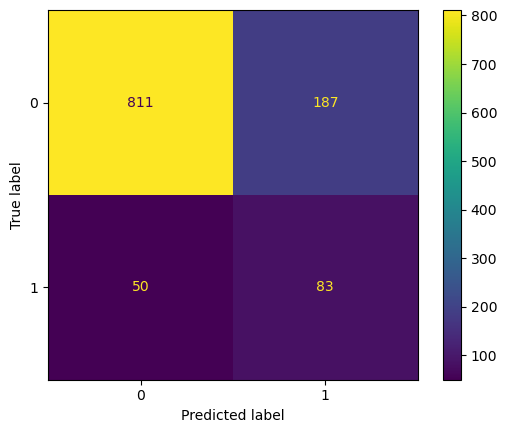

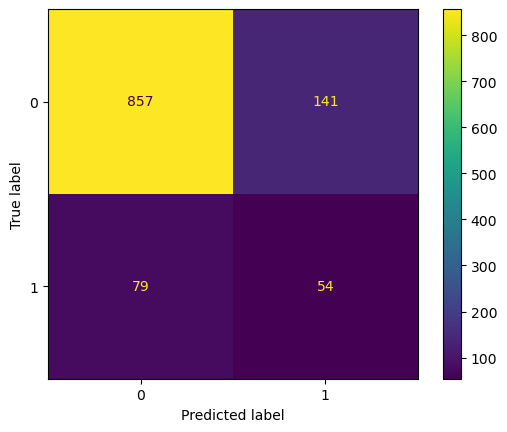

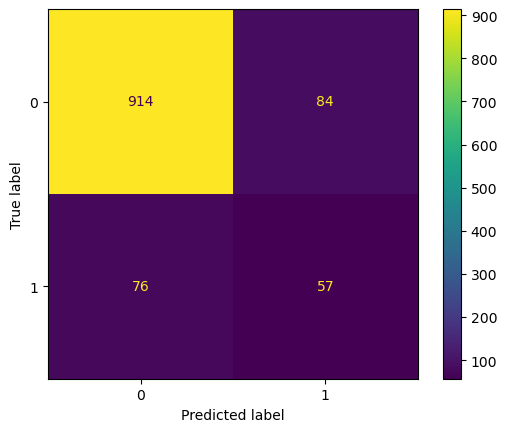

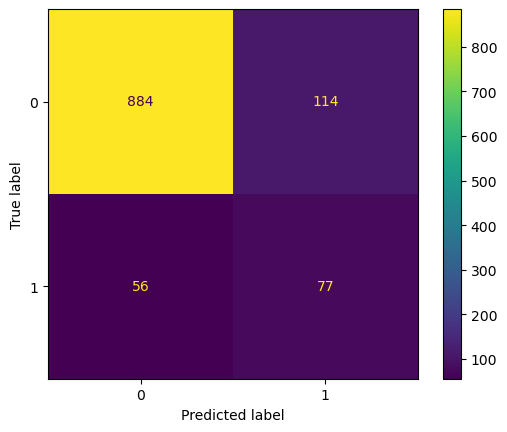

In [68]:

for model in models:
    name = type(model).__name__
    Name.append(name)
    model = OneVsRestClassifier(model)
    begin = time.time()
    model.fit(x_train,y_train)
    prediction = model.predict(x_test)
    y= model.predict(x_train)
    
    end = time.time()
    Accuracy_tra.append(accuracy_score(y,y_train))
    Accuracy.append(accuracy_score(prediction,y_test))
    Precision.append(precision_score(prediction,y_test,average = 'macro'))
    Recall.append(recall_score(prediction,y_test,average = 'macro'))
    F1_Score.append(f1_score(prediction,y_test,average = 'macro'))
    Time_Taken.append(end-begin)
    print(name + ' Successfully Trained')
        
    
    print(confusion_matrix(y_test,prediction))
    plot_confusion_matrix(model,x_test,y_test)

In [69]:
Dict = {'Name':Name,'Accuracy_tra':Accuracy_tra,'Accuracy_te':Accuracy,'Precision_score':Precision,'Recall_score':Recall,
        'F1_score':F1_Score,'Time Taken':Time_Taken}
model_df = pd.DataFrame(Dict)
model_df

Name  Accuracy_tra  Accuracy_te  Precision_score  \
0          LogisticRegression      0.855333     0.790451         0.718343   
1                 BernoulliNB      0.809833     0.805482         0.632366   
2      RandomForestClassifier      1.000000     0.858532         0.672202   
3  GradientBoostingClassifier      0.919833     0.849691         0.732359   

   Recall_score  F1_score  Time Taken  
0      0.624668  0.642211    0.049011  
1      0.596261  0.607757    0.009002  
2      0.663744  0.667788    0.543908  
3      0.671783  0.693795    0.553355

# randomforest has the best accuracy, precision, recall and f1 score so Applying Hyper parameter tunning for final model

In [70]:
#RF
#GRIDCV SEARCH
from sklearn.model_selection import GridSearchCV
estimator=RandomForestClassifier(random_state=101)
param_grid = {"criterion":["gini", "entropy"],
              "n_estimators":list(range(1,20)),
              "max_depth":list(range(3,20)),"max_leaf_nodes":list(range(3,11))}
full_cv_classifier=GridSearchCV(estimator,param_grid,cv=5)
print(full_cv_classifier.fit(x_train,y_train))
full_cv_classifier.best_estimator_

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=101),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,
                                       15, 16, 17, 18, 19],
                         'max_leaf_nodes': [3, 4, 5, 6, 7, 8, 9, 10],
                         'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19]})


RandomForestClassifier(criterion='entropy', max_depth=4, max_leaf_nodes=10,
                       n_estimators=17, random_state=101)

In [73]:
model=RandomForestClassifier(criterion='entropy', max_depth=4, max_leaf_nodes=10,
                       n_estimators=17, random_state=101)
model.fit(x_train,y_train)
prediction = model.predict(x_test)

print('accuracy: ',accuracy_score(prediction,y_test))
print('precision: ',precision_score(prediction,y_test,average = 'macro'))
print('recall_score: ',recall_score(prediction,y_test,average = 'macro'))
print('f1_score',f1_score(prediction,y_test,average = 'macro'))
print(name + ' Successfully Trained')


accuracy:  0.8037135278514589
precision:  0.7356329199752889
recall_score:  0.6377394636015326
f1_score 0.658852270133371
GradientBoostingClassifier Successfully Trained


In [74]:
pred=model.predict(x_train)
class_re = classification_report(pred,y_train)

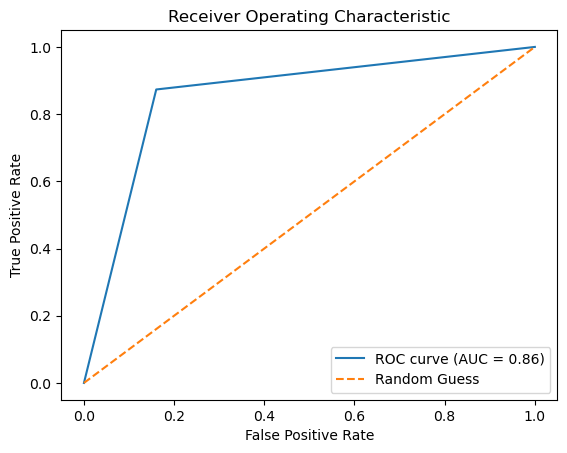

In [75]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve

# Your prediction probabilities for positive class (e.g. [0.1, 0.3, 0.8, 0.6, ...])
y_pred_proba = pred

# Your actual target labels (e.g. [0, 0, 1, 1, ...])
y_true = y_train

# Calculate ROC curve and ROC AUC
fpr, tpr, thresholds = roc_curve(y_true, y_pred_proba)
roc_auc = roc_auc_score(y_true, y_pred_proba)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()
